## Recommenders

## Content-based filtering

In [1]:
import pandas as pd
df = pd.read_csv("../Data/fruit_nutrition.csv")
df.head()


,fruit_100g,energy_kcal,water_g,protein_g,totalfat_g,fiber_g,sugars_g,vitaminc_mg
0,Banana,89,74.9,1.09,0.33,2.6,12.20,8.7
1,Lemon,29,89.0,1.10,0.30,2.8,2.50,53.0
2,Lime,30,88.3,0.70,0.20,2.8,1.69,29.1
3,Mango,46,88.3,0.91,0.27,1.5,8.39,4.1
4,Peach,60,83.5,0.82,0.38,1.6,13.70,36.4


In [5]:
fruit_df= df.set_index('fruit_100g')
fruit_df.index.name=None
fruit_df

,energy_kcal,water_g,protein_g,totalfat_g,fiber_g,sugars_g,vitaminc_mg
Banana,89,74.9,1.09,0.33,2.6,12.20,8.7
Lemon,29,89.0,1.10,0.30,2.8,2.50,53.0
Lime,30,88.3,0.70,0.20,2.8,1.69,29.1
Mango,46,88.3,0.91,0.27,1.5,8.39,4.1
Peach,60,83.5,0.82,0.38,1.6,13.70,36.4
Pineapple,50,86.0,0.54,0.12,1.4,9.85,47.8


In [6]:
df2=fruit_df.iloc[:,5:]
df2

,sugars_g,vitaminc_mg
Banana,12.20,8.7
Lemon,2.50,53.0
Lime,1.69,29.1
Mango,8.39,4.1
Peach,13.70,36.4
Pineapple,9.85,47.8


In [22]:
df2.loc[['Banana','Pineapple']]

,sugars_g,vitaminc_mg
Banana,12.20,8.7
Pineapple,9.85,47.8


#### cosine similarity with sugars_g and vitaminc_mg

In [9]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
np.set_printoptions(linewidth=np.inf) #to set the array in a line and prevent wrapping
cs=cosine_similarity(df2)
cs

array([[1.        , 0.61832414, 0.62683477, 0.9864306 , 0.83018982, 0.73298243],
       [0.61832414, 1.        , 0.99994086, 0.48090193, 0.95146351, 0.98784307],
       [0.62683477, 0.99994086, 1.        , 0.49040872, 0.95475426, 0.98947527],
       [0.9864306 , 0.48090193, 0.49040872, 1.        , 0.72739811, 0.61135407],
       [0.83018982, 0.95146351, 0.95475426, 0.72739811, 1.        , 0.98773952],
       [0.73298243, 0.98784307, 0.98947527, 0.61135407, 0.98773952, 1.        ]])

In [11]:
cs_df=pd.DataFrame(cs,index=df2.index, columns=df2.index)
cs_df

,Banana,Lemon,Lime,Mango,Peach,Pineapple
Banana,1.000000,0.618324,0.626835,0.986431,0.830190,0.732982
Lemon,0.618324,1.000000,0.999941,0.480902,0.951464,0.987843
Lime,0.626835,0.999941,1.000000,0.490409,0.954754,0.989475
Mango,0.986431,0.480902,0.490409,1.000000,0.727398,0.611354
Peach,0.830190,0.951464,0.954754,0.727398,1.000000,0.987740
Pineapple,0.732982,0.987843,0.989475,0.611354,0.987740,1.000000


In [15]:
cs_df[['Mango']].sort_values(by='Mango',ascending=False)

,Mango
Mango,1.000000
Banana,0.986431
Peach,0.727398
Pineapple,0.611354
Lime,0.490409
Lemon,0.480902


#### Cosine similary with all the data

In [12]:
cs2=cosine_similarity(fruit_df)
cs2

array([[1.        , 0.77186848, 0.83412488, 0.92474189, 0.93676783, 0.87931265],
       [0.77186848, 1.        , 0.97739451, 0.87650678, 0.94133956, 0.9780653 ],
       [0.83412488, 0.97739451, 1.        , 0.95282112, 0.95471941, 0.96986632],
       [0.92474189, 0.87650678, 0.95282112, 1.        , 0.94580335, 0.91804609],
       [0.93676783, 0.94133956, 0.95471941, 0.94580335, 1.        , 0.98972148],
       [0.87931265, 0.9780653 , 0.96986632, 0.91804609, 0.98972148, 1.        ]])

In [13]:
cs_df2=pd.DataFrame(cs2,index=fruit_df.index, columns=fruit_df.index)
cs_df2

,Banana,Lemon,Lime,Mango,Peach,Pineapple
Banana,1.000000,0.771868,0.834125,0.924742,0.936768,0.879313
Lemon,0.771868,1.000000,0.977395,0.876507,0.941340,0.978065
Lime,0.834125,0.977395,1.000000,0.952821,0.954719,0.969866
Mango,0.924742,0.876507,0.952821,1.000000,0.945803,0.918046
Peach,0.936768,0.941340,0.954719,0.945803,1.000000,0.989721
Pineapple,0.879313,0.978065,0.969866,0.918046,0.989721,1.000000


In [16]:
cs_df2[['Mango']].sort_values(by='Mango',ascending=False)

,Mango
Mango,1.000000
Lime,0.952821
Peach,0.945803
Banana,0.924742
Pineapple,0.918046
Lemon,0.876507


In [18]:
# put the content based filtering in a function

def fruit_content_recommendation(fruit_name,cos_sim_model):
    
    return cos_sim_model[[fruit_name]].sort_values(by=fruit_name,ascending=False)

In [20]:
fruit_content_recommendation('Mango',cs_df2)

,Mango
Mango,1.000000
Lime,0.952821
Peach,0.945803
Banana,0.924742
Pineapple,0.918046
Lemon,0.876507


### Collaborative filtering

In [23]:
import pandas as pd
fruit_rating= pd.read_csv("../Data/fruit_ratings.csv")
fruit_rating.head()

,User,Fruit,Rating
0,user0,Lemon,4.3
1,user1,Lemon,4.6
2,user2,Lemon,4.2
3,user3,Lemon,4.4
4,user4,Lemon,4.1


In [26]:
fruit_rating_pivot =fruit_rating.pivot(index='User',columns='Fruit', values='Rating')
fruit_rating_pivot.head()
     pd.merge(                

Fruit,Banana,Lemon,Lime,Mango,Peach,Pineapple
User,,,,,,
user0,1.1,4.3,4.7,1.0,2.4,4.9
user1,1.2,4.6,4.5,1.3,2.1,4.8
user10,4.8,3.7,4.1,2.2,3.3,2.4
user11,2.5,2.9,3.7,4.1,1.8,4.1
user12,4.2,4.1,2.3,3.2,5.0,1.7


In [72]:
#replace missing valuewith the mean
x=fruit_rating_pivot.fillna(fruit_rating_pivot['Lime'].mean()).round(1)
x.head()

Fruit,Banana,Lemon,Lime,Mango,Peach,Pineapple
User,,,,,,
user0,1.1,4.3,4.7,1.0,2.4,4.9
user1,1.2,4.6,4.5,1.3,2.1,4.8
user10,4.8,3.7,4.1,2.2,3.3,2.4
user11,2.5,2.9,3.7,4.1,1.8,4.1
user12,4.2,4.1,2.3,3.2,5.0,1.7


## Truncated SVD

In [33]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components= 2)
svd.fit(x)

TruncatedSVD()

In [36]:
# U (user x latent features)
U = svd.transform(x)
U_df=pd.DataFrame(U)
U_df.head()

,0,1
0,7.472373,4.064985
1,7.490155,3.974586
2,8.330473,0.160338
3,7.724861,0.928411
4,8.367204,-1.394362


In [37]:
U_df.shape

(30, 2)

In [40]:
# sigma
sigma=svd.singular_values_
sigma

array([42.36626195, 17.65275125])

In [41]:
#V-transpose
Vt =svd.components_
Vt

array([[ 0.42292291,  0.37641215,  0.37791833,  0.38205078,  0.44036177,  0.44356122],
       [-0.46829493,  0.4193202 ,  0.46772463, -0.42655355, -0.28946527,  0.34693808]])

In [42]:
Vt_df=pd.DataFrame(Vt, columns=x.columns)
Vt_df

Fruit,Banana,Lemon,Lime,Mango,Peach,Pineapple
0,0.422923,0.376412,0.377918,0.382051,0.440362,0.443561
1,-0.468295,0.419320,0.467725,-0.426554,-0.289465,0.346938


## choosing the number of components

In [43]:
# start by choosing the  number of the columns in the user-item matrix, here, it is 6

x.head()

Fruit,Banana,Lemon,Lime,Mango,Peach,Pineapple
User,,,,,,
user0,1.1,4.3,4.7,1.0,2.4,4.9
user1,1.2,4.6,4.5,1.3,2.1,4.8
user10,4.8,3.7,4.1,2.2,3.3,2.4
user11,2.5,2.9,3.7,4.1,1.8,4.1
user12,4.2,4.1,2.3,3.2,5.0,1.7


In [44]:
# model with 6 components
svd = TruncatedSVD(n_components= 6)
svd.fit(x)

TruncatedSVD(n_components=6)

In [47]:
# U (user x latent features)
U6 = svd.transform(x)
U6_df=pd.DataFrame(U6)
U6_df.head()

,0,1,2,3,4,5
0,7.472373,4.064985,0.067986,-0.247908,-0.364744,0.020722
1,7.490155,3.974586,0.067844,-0.212386,0.198628,-0.032770
2,8.330473,0.160338,-1.444983,1.841298,0.035282,0.357659
3,7.724861,0.928411,1.781961,0.499368,0.997727,-0.504347
4,8.367204,-1.394362,-2.265261,-0.045282,0.287017,-0.836554


In [48]:
U6_df.shape

(30, 6)

In [52]:
# explained_variance_ratio_
EVR=svd.explained_variance_ratio_
EVR

array([0.01099579, 0.83486812, 0.08033115, 0.04955458, 0.01468284, 0.00956752])

In [57]:
# cummulative sum of  explained_variance_ratio_
import numpy as np
EVR_cumsum = np.cumsum(EVR).round(2)
EVR_cumsum

array([0.01, 0.85, 0.93, 0.98, 0.99, 1.  ])

#### it captured about 80% of the data at component 2, hence choos n_components=2 

In [73]:
xf=pd.DataFrame(EVR_cumsum, index=range(1,7), columns=['cumsum'])

''

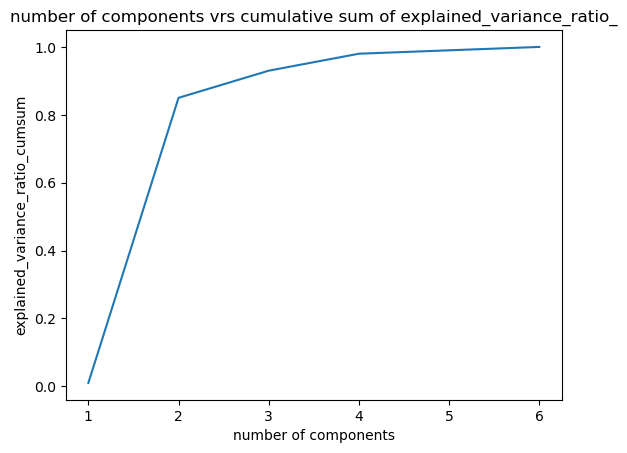

In [74]:
import matplotlib.pyplot as plt

xf.plot(kind='line',
      xlabel='number of components',
      ylabel='explained_variance_ratio_cumsum',
      title='number of components vrs cumulative sum of explained_variance_ratio_', legend=False)
;

## Making recommendation for a new user using collaborative filtering


In [76]:
#step1: select and fit a model using the best component, which is 2
svd2 = TruncatedSVD(n_components= 2)
U=svd2.fit_transform(x)
U

array([[ 7.47237261,  4.06498458],
       [ 7.49015546,  3.97458593],
       [ 8.33047256,  0.16033823],
       [ 7.72486071,  0.92841147],
       [ 8.36720361, -1.39436221],
       [ 8.0004788 , -2.57665811],
       [ 8.58884622, -0.06876994],
       [ 7.25479481, -1.22979599],
       [ 6.93652643,  0.99069268],
       [ 8.00145041,  0.66285815],
       [ 8.23393943,  0.38062487],
       [ 8.48395499,  0.53381006],
       [ 7.50696104,  4.09498414],
       [ 7.69995645, -3.91776147],
       [ 7.72758605, -3.73229599],
       [ 7.69858983, -3.7140955 ],
       [ 7.73978839, -3.72968866],
       [ 7.70496106, -3.725197  ],
       [ 7.77786657, -3.8369615 ],
       [ 7.93001967, -3.74198266],
       [ 7.58753194, -3.64365461],
       [ 7.63438201, -3.62617747],
       [ 7.55390334, -3.48273317],
       [ 7.55446325,  3.98854226],
       [ 7.39566624,  4.02687791],
       [ 7.54233048,  3.89264382],
       [ 7.42117469,  3.97291149],
       [ 7.57432481,  4.1433931 ],
       [ 7.3463391 ,

In [80]:
sum(svd2.explained_variance_ratio_).round(2)

0.85

In [81]:
#step2: introduce new_user
new_user=np.array([np.NAN,2,np.NAN,5,np.NAN,np.NAN])
new_user

array([nan,  2., nan,  5., nan, nan])

In [83]:
#new_user dataframe
new_user_df= pd.DataFrame([new_user],columns=x.columns)
new_user_df

Fruit,Banana,Lemon,Lime,Mango,Peach,Pineapple
0,NaN,2.0,NaN,5.0,NaN,NaN


In [89]:
new_user_2d=svd2.transform(new_user_df.fillna(fruit_rating_pivot['Lime'].mean()))
new_user_2d

array([[ 7.61279931, -1.1269517 ]])

In [92]:
new_user_2d.shape

(1, 2)

In [94]:
# step3 : model recommendation
VT=svd2.components_
VT

array([[ 0.42292291,  0.37641215,  0.37791833,  0.38205078,  0.44036177,  0.44356122],
       [-0.46829493,  0.4193202 ,  0.46772463, -0.42655355, -0.28946527,  0.34693808]])

In [90]:
VT.shape

(2, 6)

In [97]:
new_user_recs=np.dot(new_user_2d,VT)
new_user_recs

array([[3.747373  , 2.39299654, 2.34991338, 3.38918113, 3.67859915, 2.98576008]])

In [114]:
new_user_recs_df=pd.DataFrame(new_user_recs,columns=x.columns)
new_user_recs_sort=new_user_recs_df.T.sort_values(by=0,ascending=False)
new_user_recs_sort.index.name=None
new_user_recs_sort.columns=['Recommendations']
new_user_recs_sort

,Recommendations
Banana,3.747373
Peach,3.678599
Mango,3.389181
Pineapple,2.985760
Lemon,2.392997
Lime,2.349913


In [118]:
already_rated=new_user_df.T.dropna().index
already_rated

Index(['Lemon', 'Mango'], dtype='object', name='Fruit')

In [117]:
new_user_recs_sort[~new_user_recs_sort.index.isin(already_rated)]

,Recommendations
Banana,3.747373
Peach,3.678599
Pineapple,2.985760
Lime,2.349913
